In [1]:
# imports: 
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0);

## Gradient-based optimization

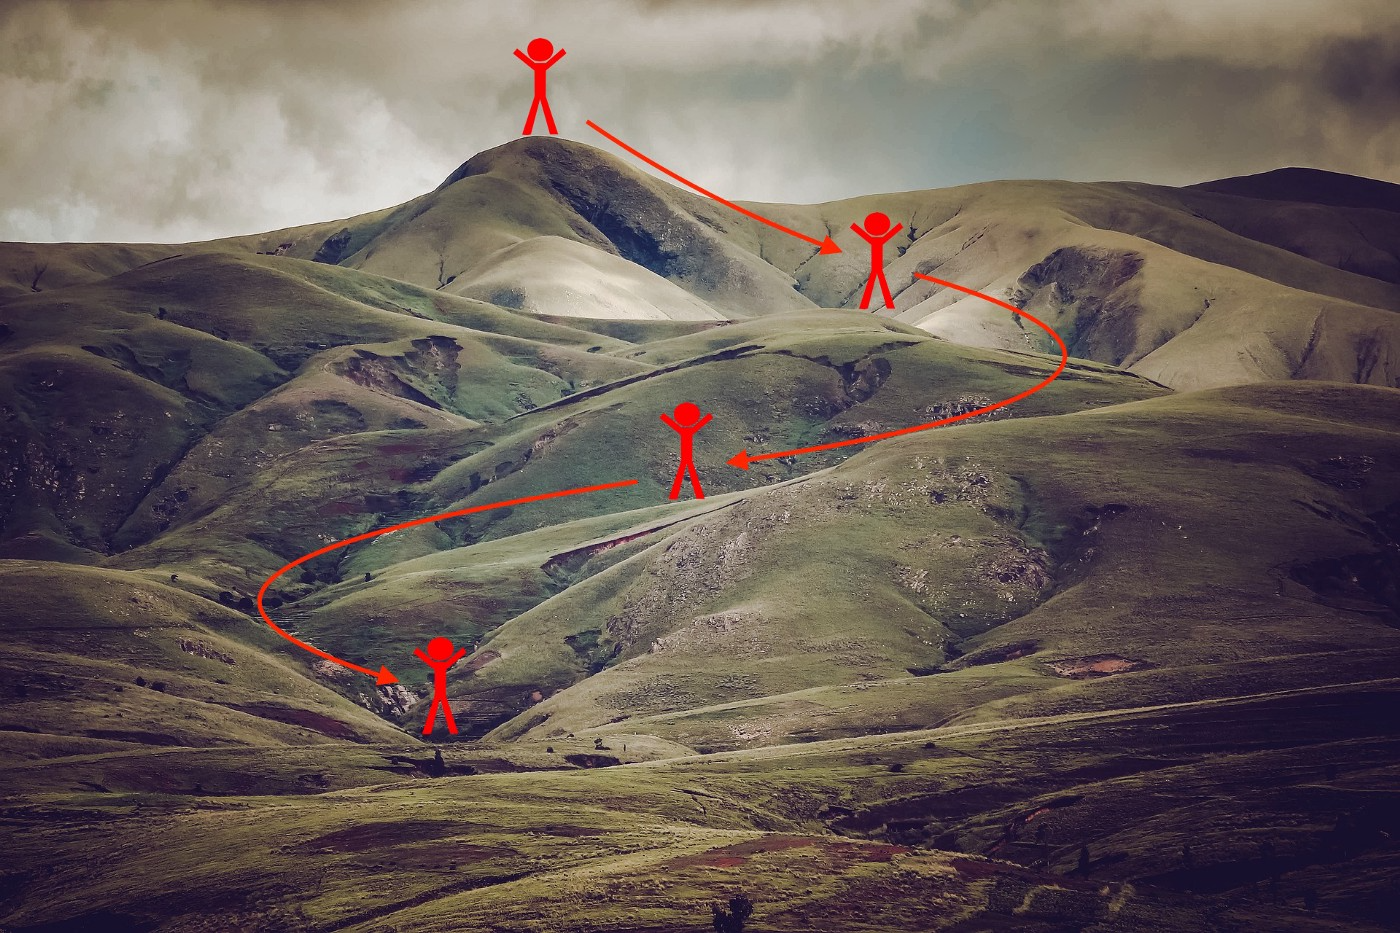

------

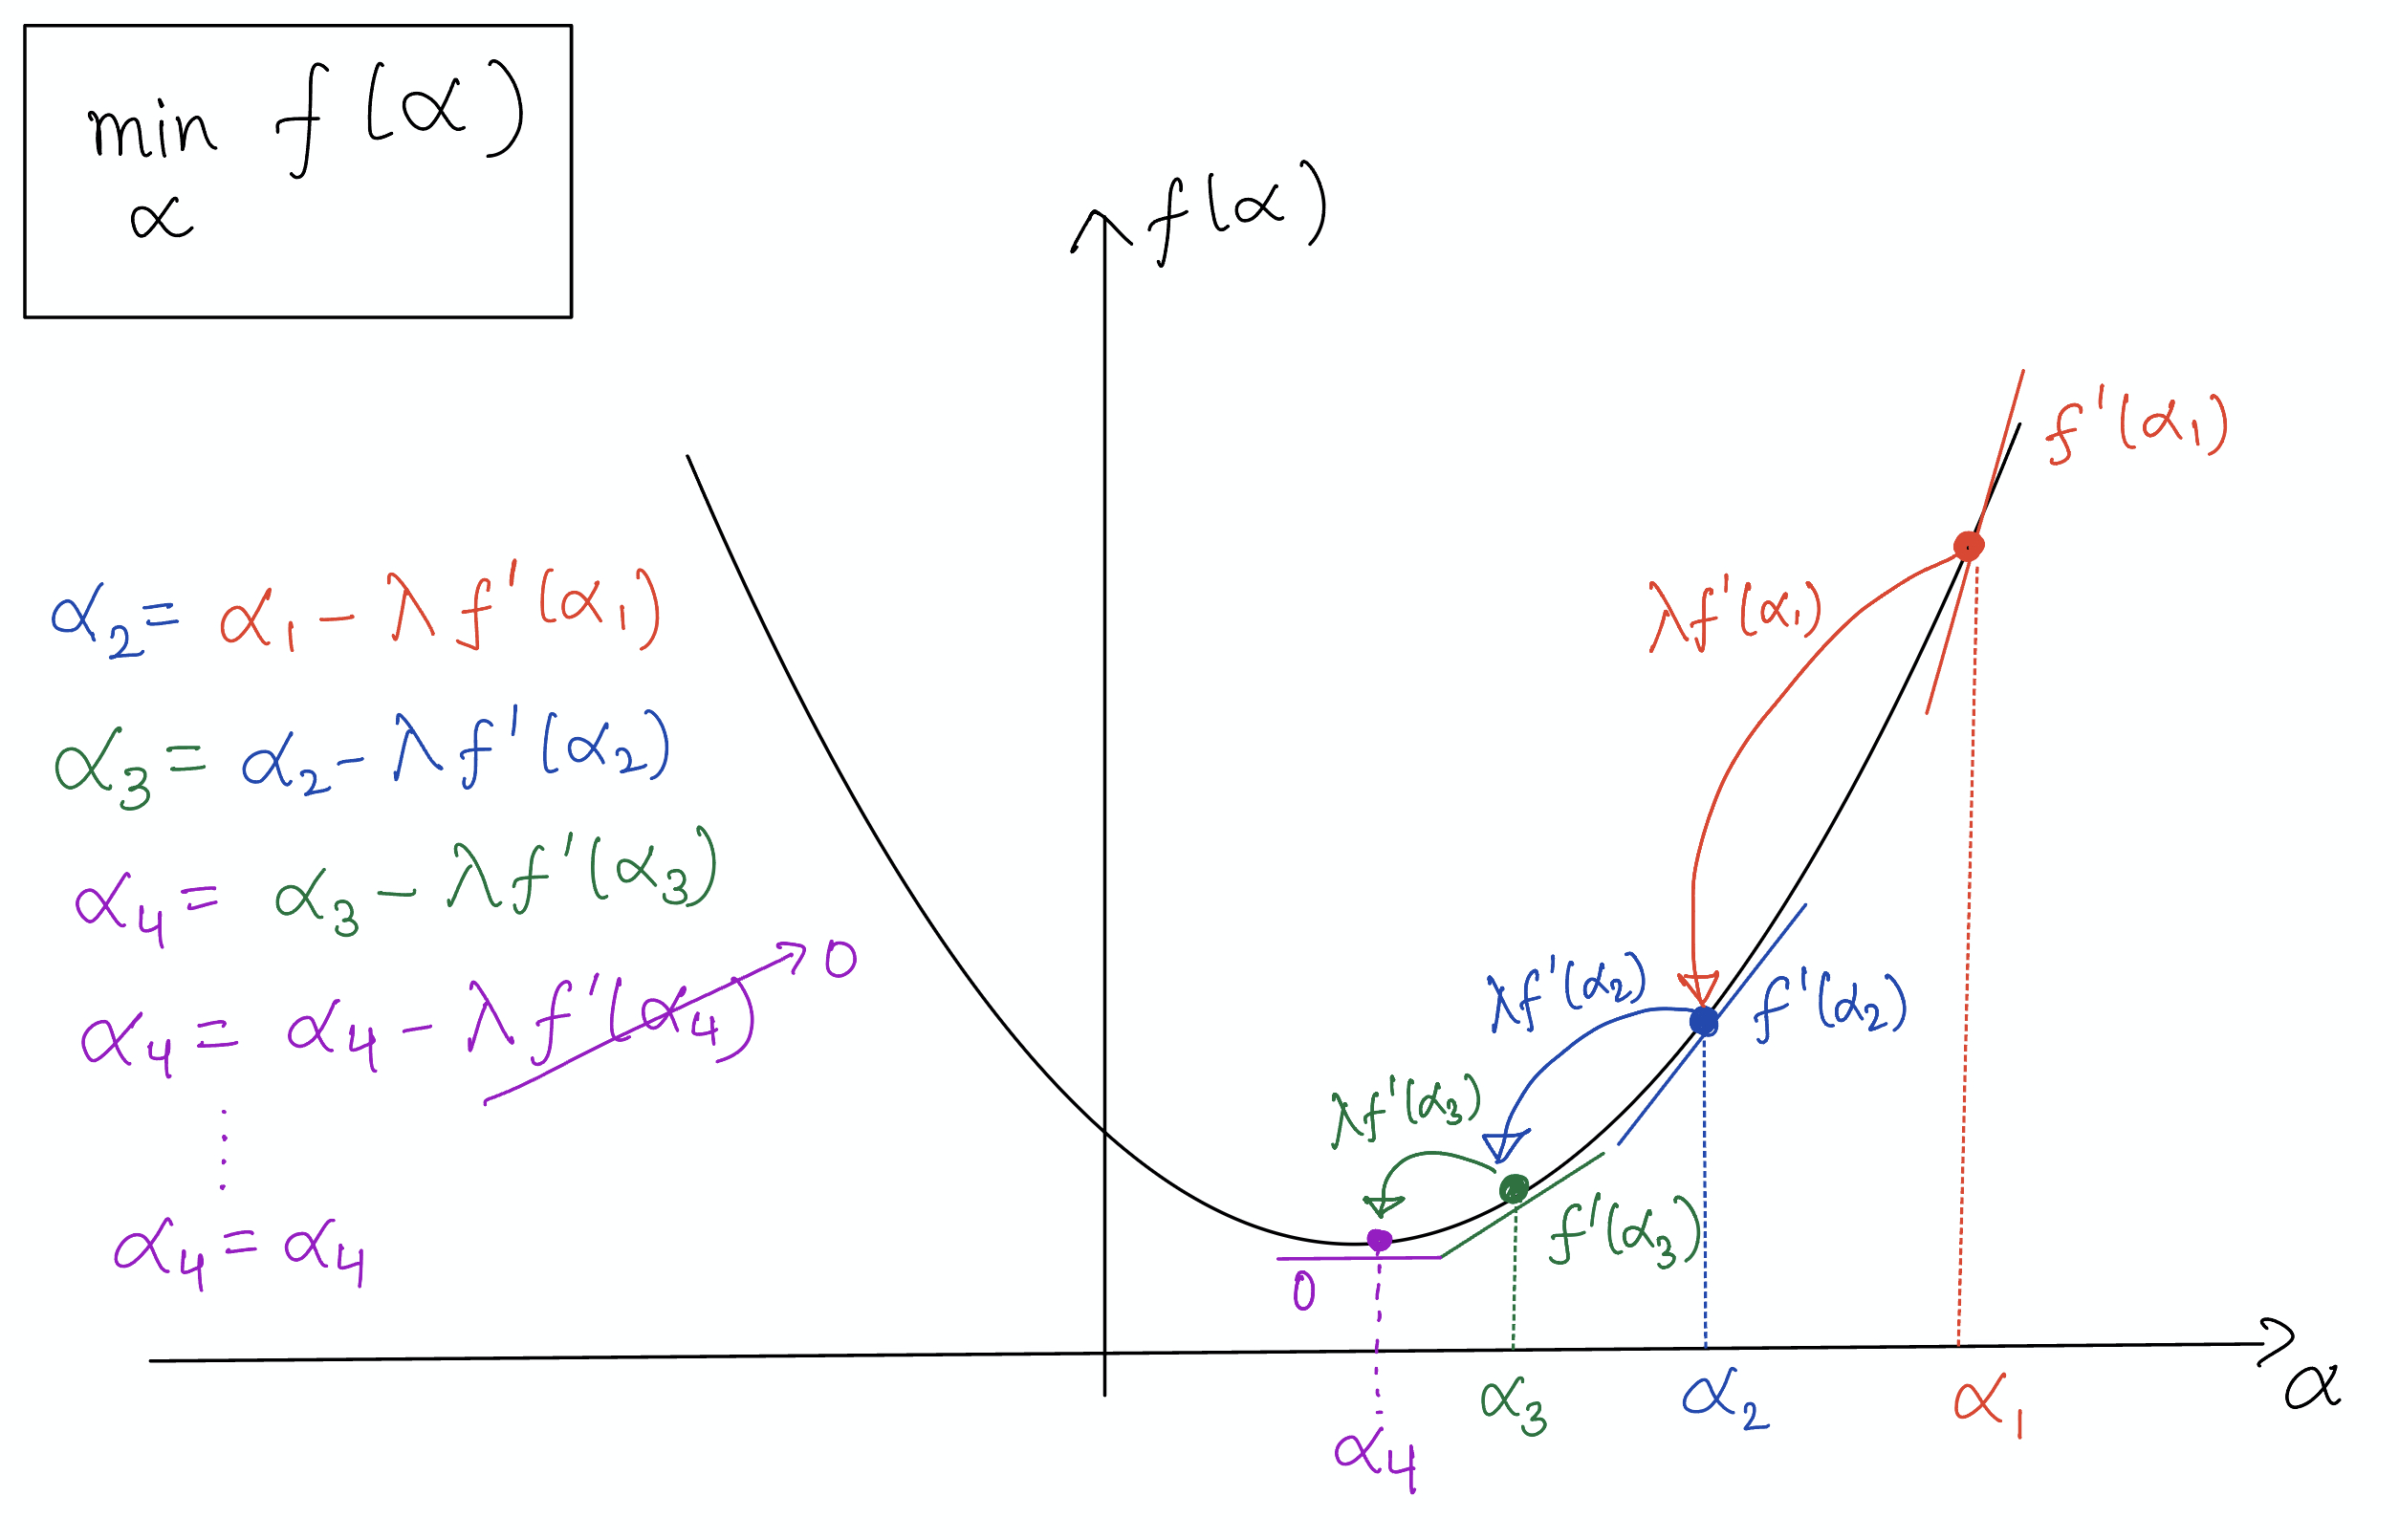

***We want to use gradients produced by automatic differentiation to solve some optimization problems. For now, we consider a very simple line-fitting problem. Later on, we can replace linear equation with much more complex neural networks.***

Generate some "x" data where measurements 'y' are made. In ML, "x" is usually called **features** , while "y" are called **labels**.

In [2]:
# x-values (features)
x = torch.tensor([1.,2.,3.,4.,5.,6.])
#----------------------------------------------
print('x: ',x)

x:  tensor([1., 2., 3., 4., 5., 6.])


***Lets say the hidden true model is given as following.***

***True model:***  $ y=3x$


In [3]:
# True y-values (labels):
y_true = 3*x
#----------------------------------------------
print('y_true: ',y_true)

y_true:  tensor([ 3.,  6.,  9., 12., 15., 18.])


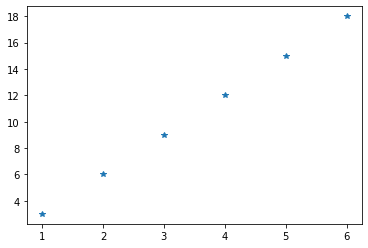

In [4]:
# Plot the data with linestyle = 'None', marker='*'
plt.plot(x, y_true,linestyle = 'None',marker='*')

***Lets assume a model with some parameters that we want to fit.***

***Assumed model*** : $y = f(x) = \alpha x$

***We need to find the parameter $\alpha$***

In [5]:
# Create alpha as a variable whose gradients need to be tracked
# - set alpha to zero as initial guess
# - set requires_grad=True

alpha = torch.tensor([0.], requires_grad = True)

#----------------------------------------------
print('alpha:', alpha)

alpha: tensor([0.], requires_grad=True)


In [6]:
# Lets make a prediction
y_pred = alpha * x

# Compute squared-error using torch.norm()
loss = torch.norm(y_pred - y_true)**2

#----------------------------------------------
print('y_pred: ', y_pred)
print('y_true: ', y_true)
print('loss:', loss)

y_pred:  tensor([0., 0., 0., 0., 0., 0.], grad_fn=<MulBackward0>)
y_true:  tensor([ 3.,  6.,  9., 12., 15., 18.])
loss: tensor(818.9999, grad_fn=<PowBackward0>)


***Now, we do an iterative appraoch to find the best alpha to fit the data***

In [12]:
# Define an empty list to store loss history
loss_history = []

# Define a learning rate
lr = 0.01

# Initialize alpha as tensor with value 0. as initial guess
alpha = torch.tensor([0.])

# Set requires_grad to True for alpha
alpha.requires_grad = True

# Lets write an optimization loop to improve the predictions and find the parameters
for i in range(100):
    
    # make a prediction
    y_pred = alpha * x
    
    # compute squared-error using torch.norm()
    loss = torch.norm(y_pred - y_true)**2
    
    # store the loss in a list
    loss_history.append(loss.detach().item())
    
    # compute gradient of loss relative to alpha
    loss.backward()
    
    # Turn off gradient tracking to not connect graph starting from alpha back to alpha
    with torch.no_grad():
        
        # update the value of alpha using the gradient
        alpha -= lr*alpha.grad
    
        # Remove any gradient information for future iterations
        alpha.grad.zero_()

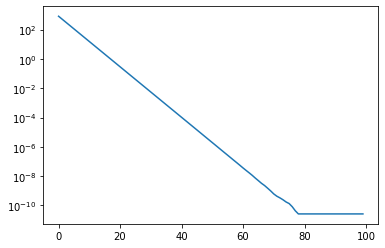

In [13]:
# Plot loss_history
plt.plot(loss_history)
plt.yscale("log")

In [14]:
# Check the final value of alpha
alpha

tensor([3.0000], requires_grad=True)

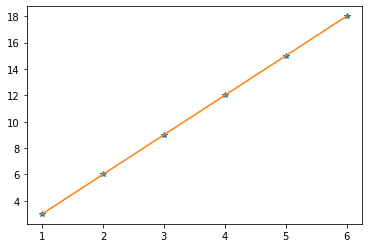

In [16]:
# Make final predictions; use .detach() to get rid of computational graph
y_pred = (alpha * x).detach()

# Plot the data (with linestyle = 'None',marker='*' for y_true)
plt.plot(x, y_true,linestyle = 'None',marker='*')
plt.plot(x, y_pred)

# Questions?